# **House Price Project**
<br>

In [444]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics\
import accuracy_score as accuracy, recall_score as recall, precision_score as precision,\
      f1_score as f1, confusion_matrix, plot_roc_curve

from scipy import stats

import missingno as msno

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import statsmodels.tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df = pd.read_csv('train.csv')

<br>

## **Data Pre-processing** ##
<br>

In [75]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
df.columns = [col.lower() for col in df.columns]

In [77]:
df.shape

(1460, 81)

In [78]:
df['id'].nunique()

1460

In [79]:
del df['id']

In [80]:
print(f'Number of Duplicates in DataFrame: {df.duplicated().sum()}')

Number of Duplicates in DataFrame: 0


### **Null Handling**

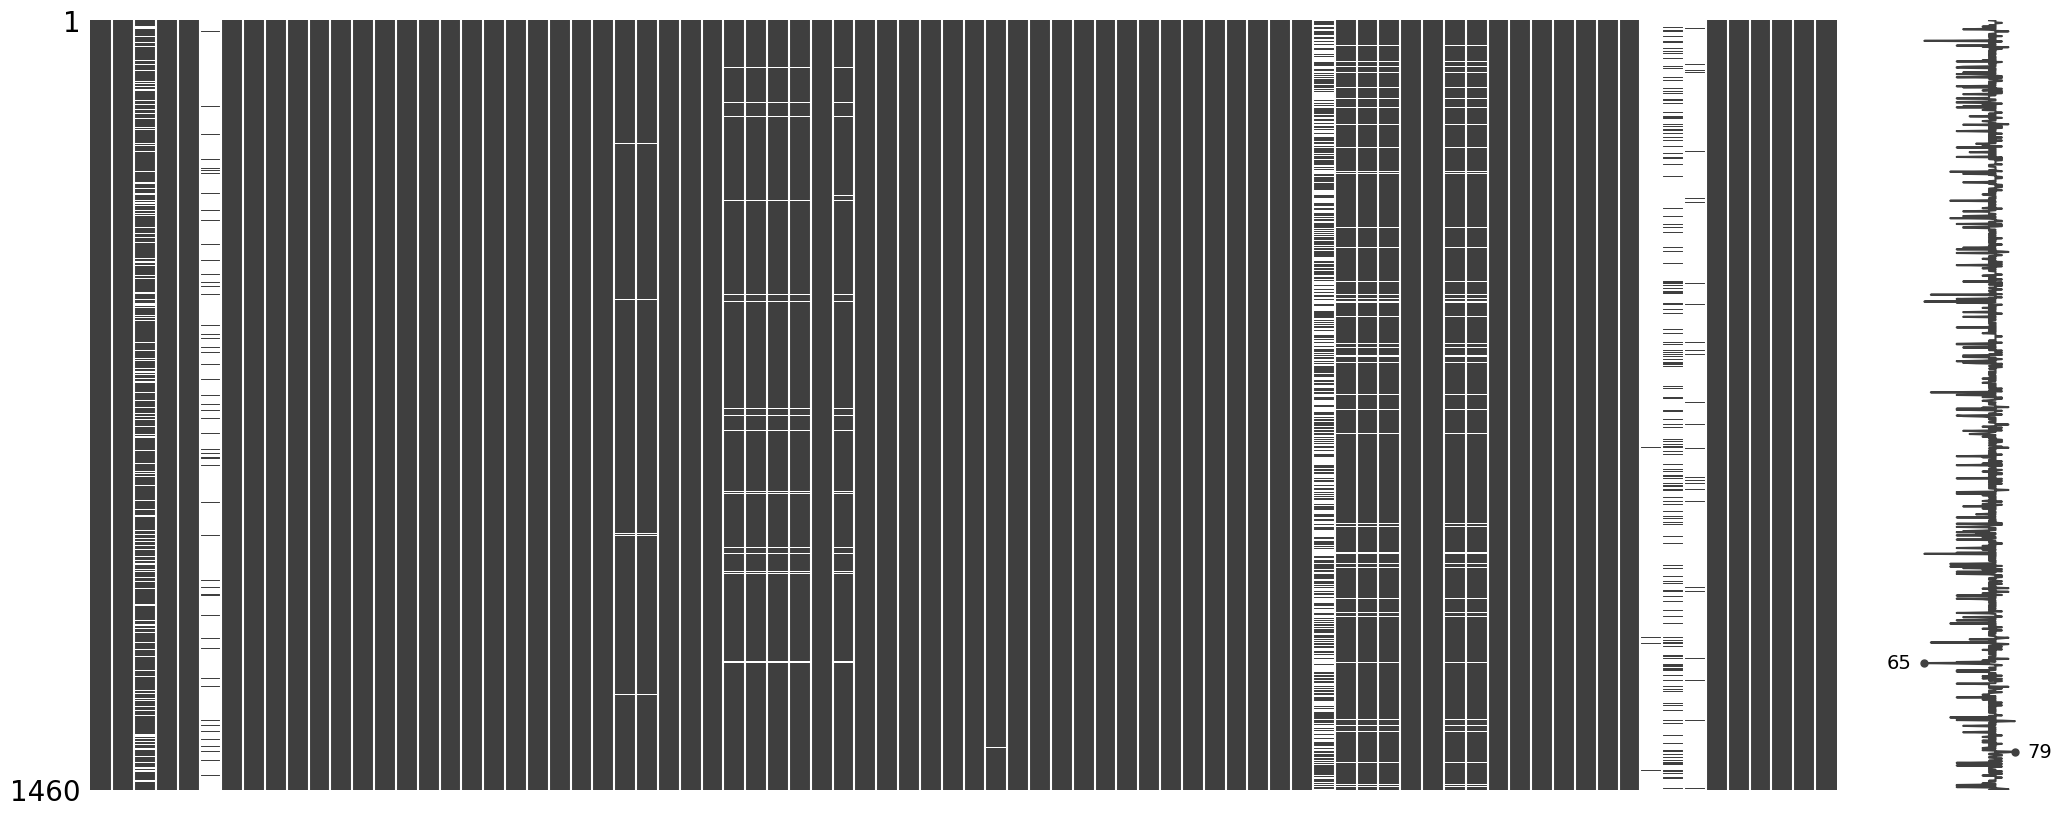

In [81]:
msno.matrix(df);

In [82]:
def null_clean(df):
    impute = [i for i in df if i.startswith(('bsmt','garage','masvnrtype')) and df[i].dtypes == 'object']
    df[impute] = df[impute].fillna('None')
    
    df['lotfrontage'] = df['lotfrontage'].fillna(df["lotfrontage"].median())
    df['masvnrarea'] = df['masvnrarea'].fillna(0)
    df['electrical'] = df['electrical'].fillna('SBrkr')
    df['garageyrblt']= df['garageyrblt'].fillna(df['yearbuilt']+5.5)
    
    
    return df

In [83]:
df = null_clean(df)

In [84]:
remove_col = [col for col in df.columns if df[col].isnull().sum() / df.shape[0] >= 0.3 and column != 'saleprice']

In [85]:
for col in remove_col: del df[col]
del df['miscval']

In [86]:
df = df.reset_index(drop=True)

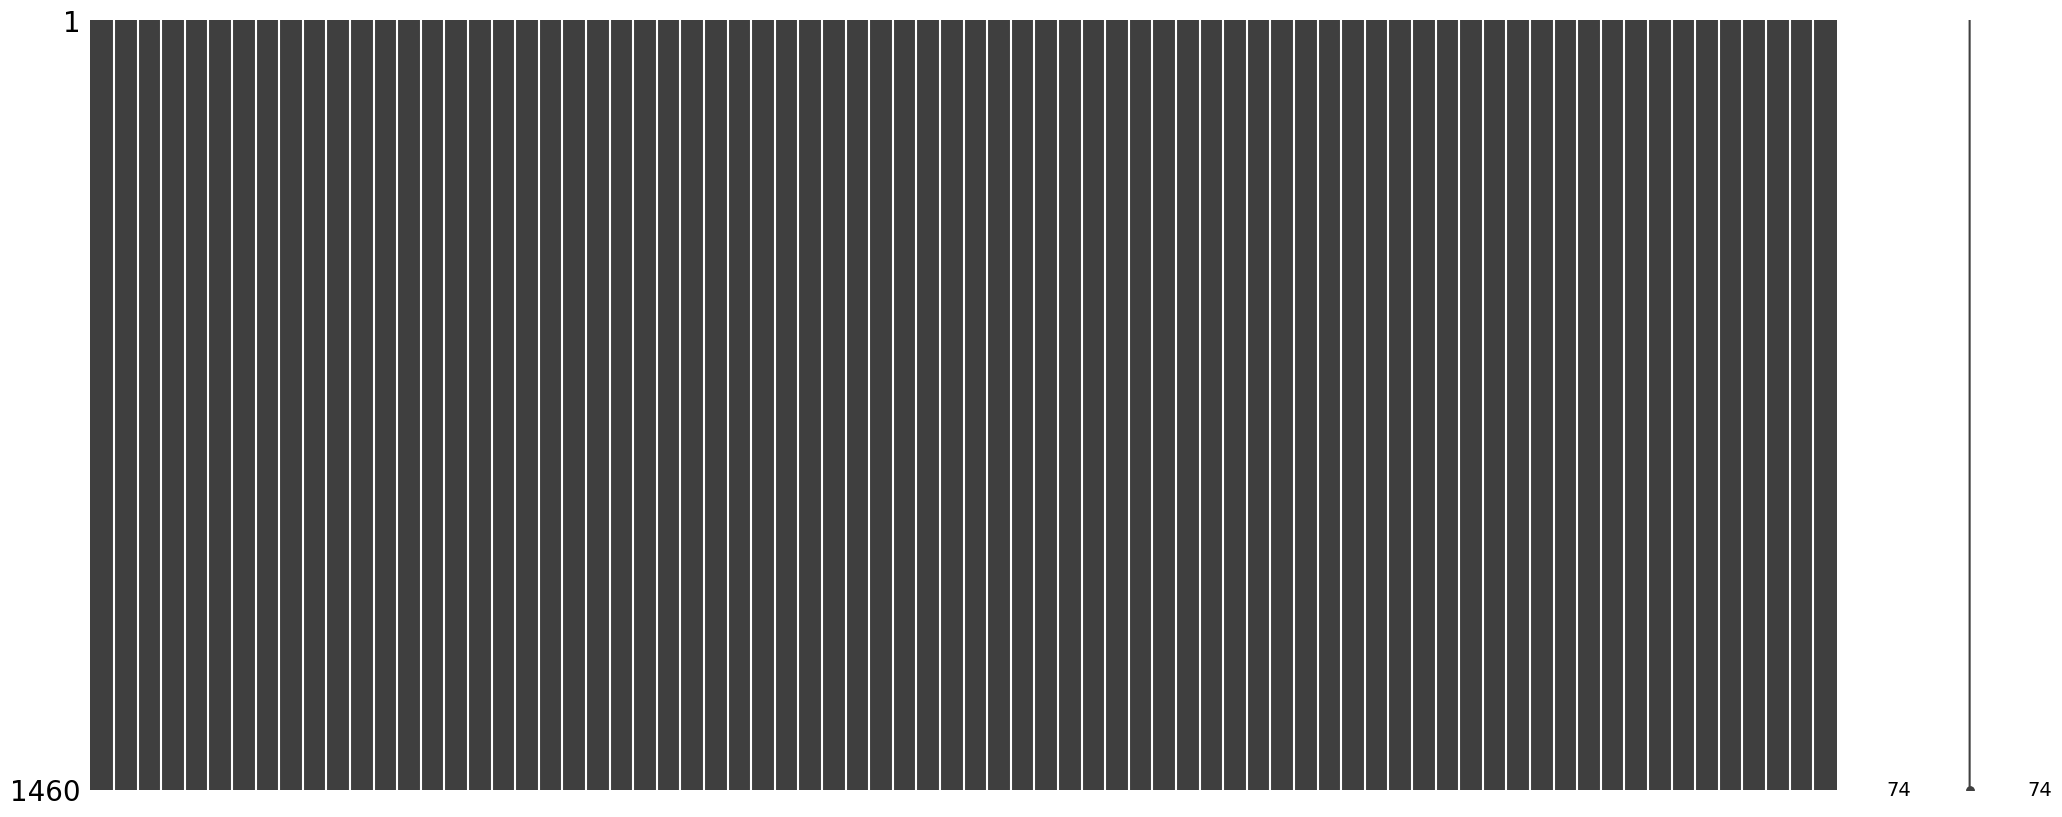

In [87]:
msno.matrix(df);

### **Removing Object Columns with Low Variance**

In [90]:
def object_col(df):
    object_cols = [col for col in df.columns if df[col].dtypes == 'object']
    return object_cols

In [91]:
object_cols = object_col(df)

In [92]:
v_cols = [i for i in df[object_cols] if (df[i].value_counts()[1] / df[i].value_counts()[0]) < 0.01]
for col in v_cols: del df[col]

In [93]:
object_cols = object_col(df)

In [94]:
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,12,2008,WD,Normal,250000


In [95]:
df.shape

(1460, 70)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<br>


## **Data Exploration**
<br>

In [97]:
def stat_(col):
    print(f'Skewness: {round(df[col].skew(),3)}')
    print(f'Kurtosis: {round(df[col].kurt(),3)}')

In [98]:
def _probplt(col):
    '''probability plot for corresponding column'''
    stats.probplot(df.loc[:,col], plot = plt)
    sns.despine()
    plt.show()

In [99]:
def g(col):
    '''boxplot and histogram for corresponding numerical column'''
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=[10,6])
    sns.set_style("ticks")
    sns.boxplot(x=df[col], ax=ax_box, color='#1f77b4',linewidth=1.5,fliersize=3)
    sns.histplot(df[col], bins = 75, kde = True, color = '#1f77b4', ax=ax_hist, edgecolor='k', linewidth=0.7)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    ax_box.set(xlabel='',yticks=[])
    ax_hist.set(ylabel='')
    plt.show()

<br><br><br>

In [100]:
df['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

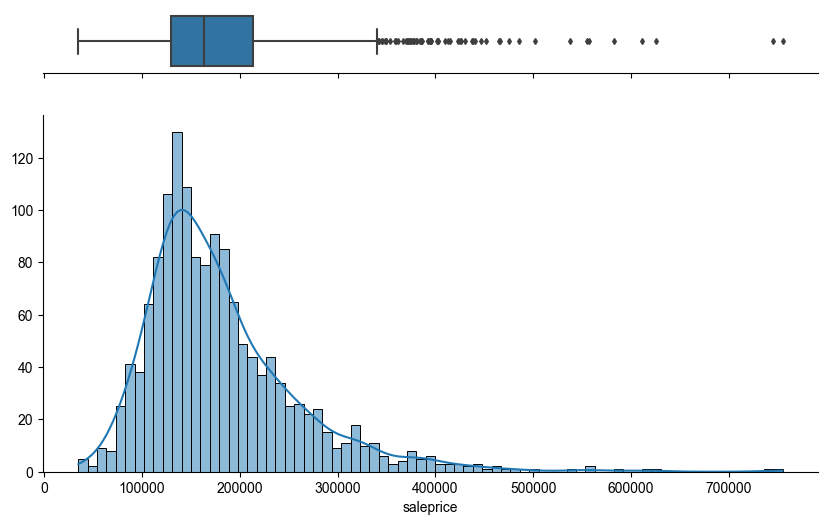

In [101]:
g('saleprice')

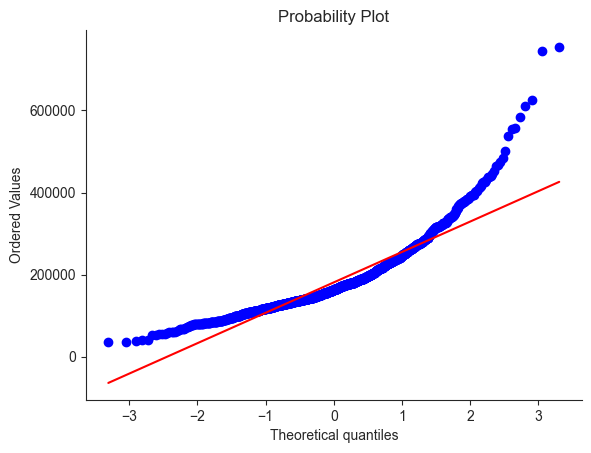

In [102]:
_probplt('saleprice')

In [103]:
stat_('saleprice')

Skewness: 1.883
Kurtosis: 6.536


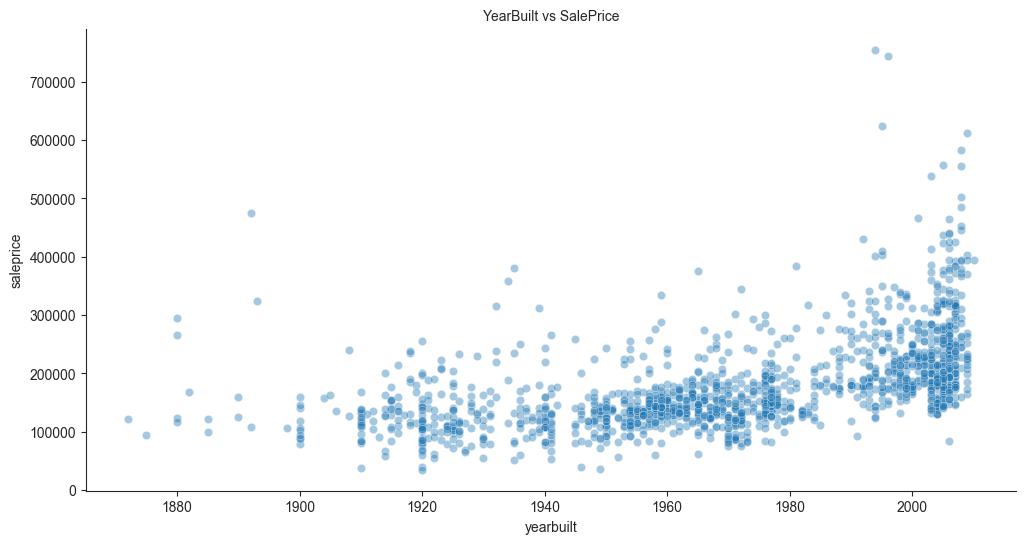

In [104]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=df, x='yearbuilt', y='saleprice', color='#1f77b4', alpha = 0.4)
plt.title('YearBuilt vs SalePrice', fontsize = 10)
sns.despine()
plt.show()

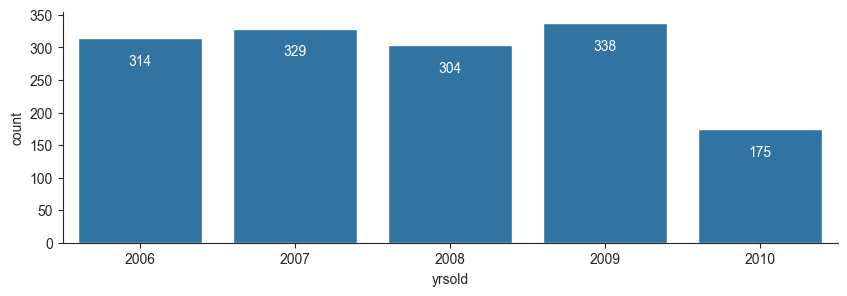

In [105]:
plt.figure(figsize=[10,3])
ax=sns.countplot(x=df['yrsold'], color = '#1f77b4' )
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)
sns.despine()
plt.show()

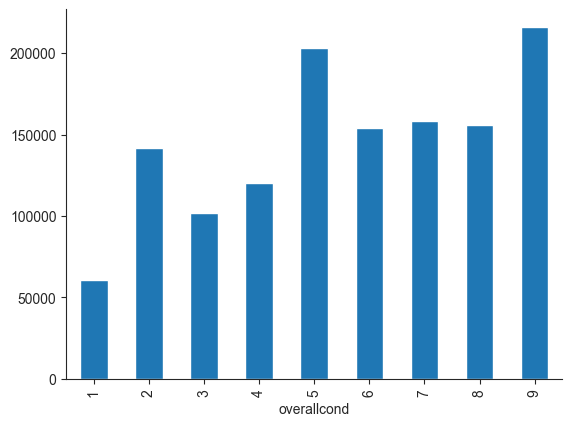

In [106]:
df[['overallcond','saleprice']].groupby('overallcond').mean().apply(
    lambda x: round(x,2)).plot(kind='bar', legend=None, color='#1f77b4')
sns.despine()
plt.show()

<br>

<br><br><br>

## **Feature Selection**
<br>

### **Numerical Columns**

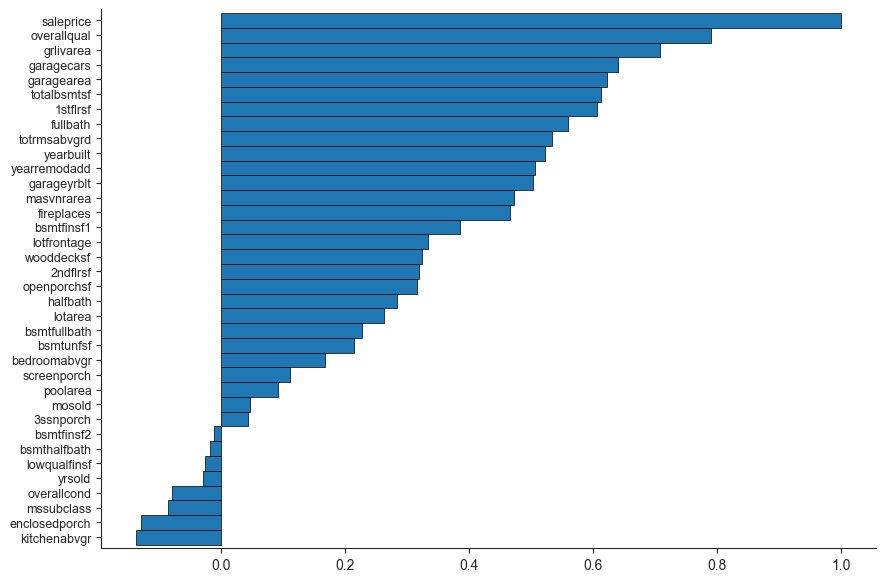

In [107]:
t1 = df.corr()['saleprice'].sort_values(ascending=True)
t1.plot(kind='barh',figsize=[10,7], width=1, edgecolor='k', linewidth=0.5);
plt.yticks(fontsize=9)
#plt.axvline(x=0.4, alpha=0.8, color='k', linestyle='--', linewidth=1.3)
sns.despine()

In [108]:
corr = df.corr()
num_lst = list(corr[corr['saleprice']>0.4].index)
num_df = df[num_lst]

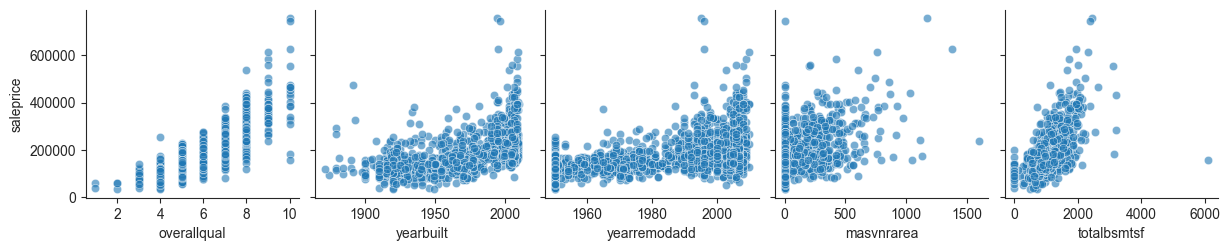

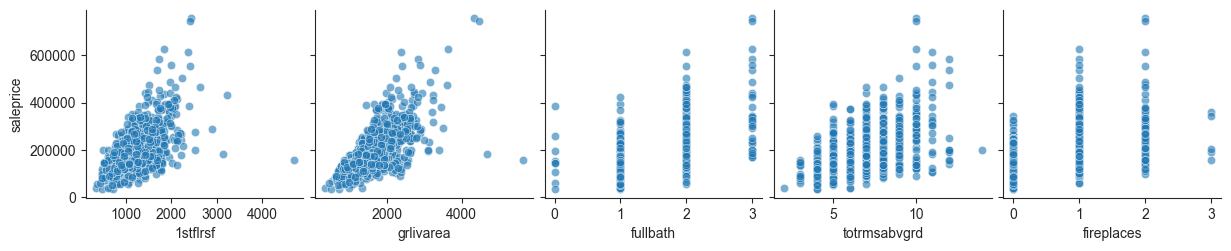

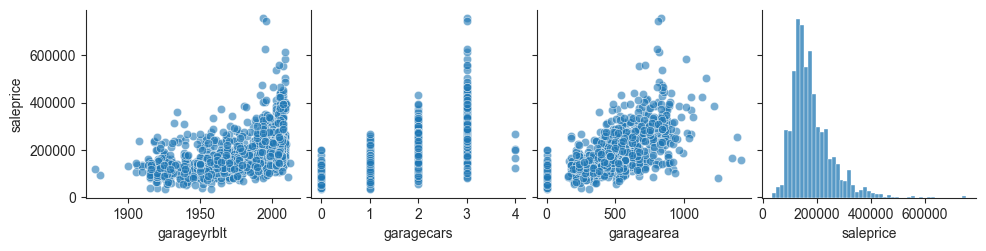

In [109]:
for i in range(0, len(num_df.columns), 5):
    sns.pairplot(data=num_df,
                x_vars=num_df.columns[i:i+5],
                y_vars=['saleprice'],plot_kws={'alpha':0.6})

In [110]:
#Can we refactor any columns?

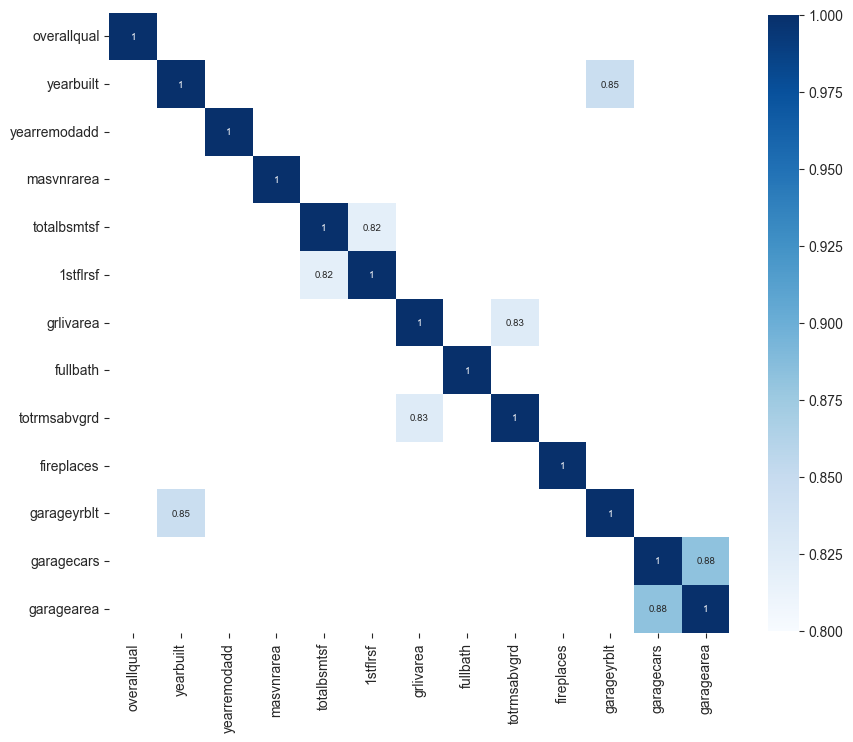

In [111]:
corr = num_df.drop('saleprice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(abs(corr) >= 0.7)], 
            cmap='Blues', vmax=1.0, vmin=0.8, cbar_kws={"shrink": 0.8},
            annot=True, annot_kws={"size": 7}, square=True);

### **Object Columns**

In [116]:
formula = 'saleprice ~ C(lotshape)'
model = ols(formula,df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(lotshape),3.0,7.032607e+11,2.344202e+11,40.132852,6.447524e-25
Residual,1456.0,8.504651e+12,5.841106e+09,NaN,NaN


In [117]:
sig_cols_df = pd.DataFrame(columns=['p-value'])
for c in df[object_cols]:
    formula = f'saleprice ~ C({c})'
    model = ols(formula,df).fit()
    p_value = anova_lm(model)['PR(>F)'][0]
    if p_value < 0.01:
        sig_cols_df.loc[c] = p_value

sig_cols_df.index.name = 'Variable'

In [118]:
sig_cols_df = sig_cols_df['p-value'].sort_values()[0:11]

In [119]:
sig_cols_lst = list(sig_cols_df.index)

In [120]:
sig_cols_lst

['neighborhood',
 'exterqual',
 'bsmtqual',
 'kitchenqual',
 'garagefinish',
 'foundation',
 'garagetype',
 'bsmtfintype1',
 'heatingqc',
 'masvnrtype',
 'bsmtexposure']

In [121]:
testtt = sig_cols_lst + ['saleprice']

In [122]:
testtt

['neighborhood',
 'exterqual',
 'bsmtqual',
 'kitchenqual',
 'garagefinish',
 'foundation',
 'garagetype',
 'bsmtfintype1',
 'heatingqc',
 'masvnrtype',
 'bsmtexposure',
 'saleprice']

In [123]:
##boxplots!!

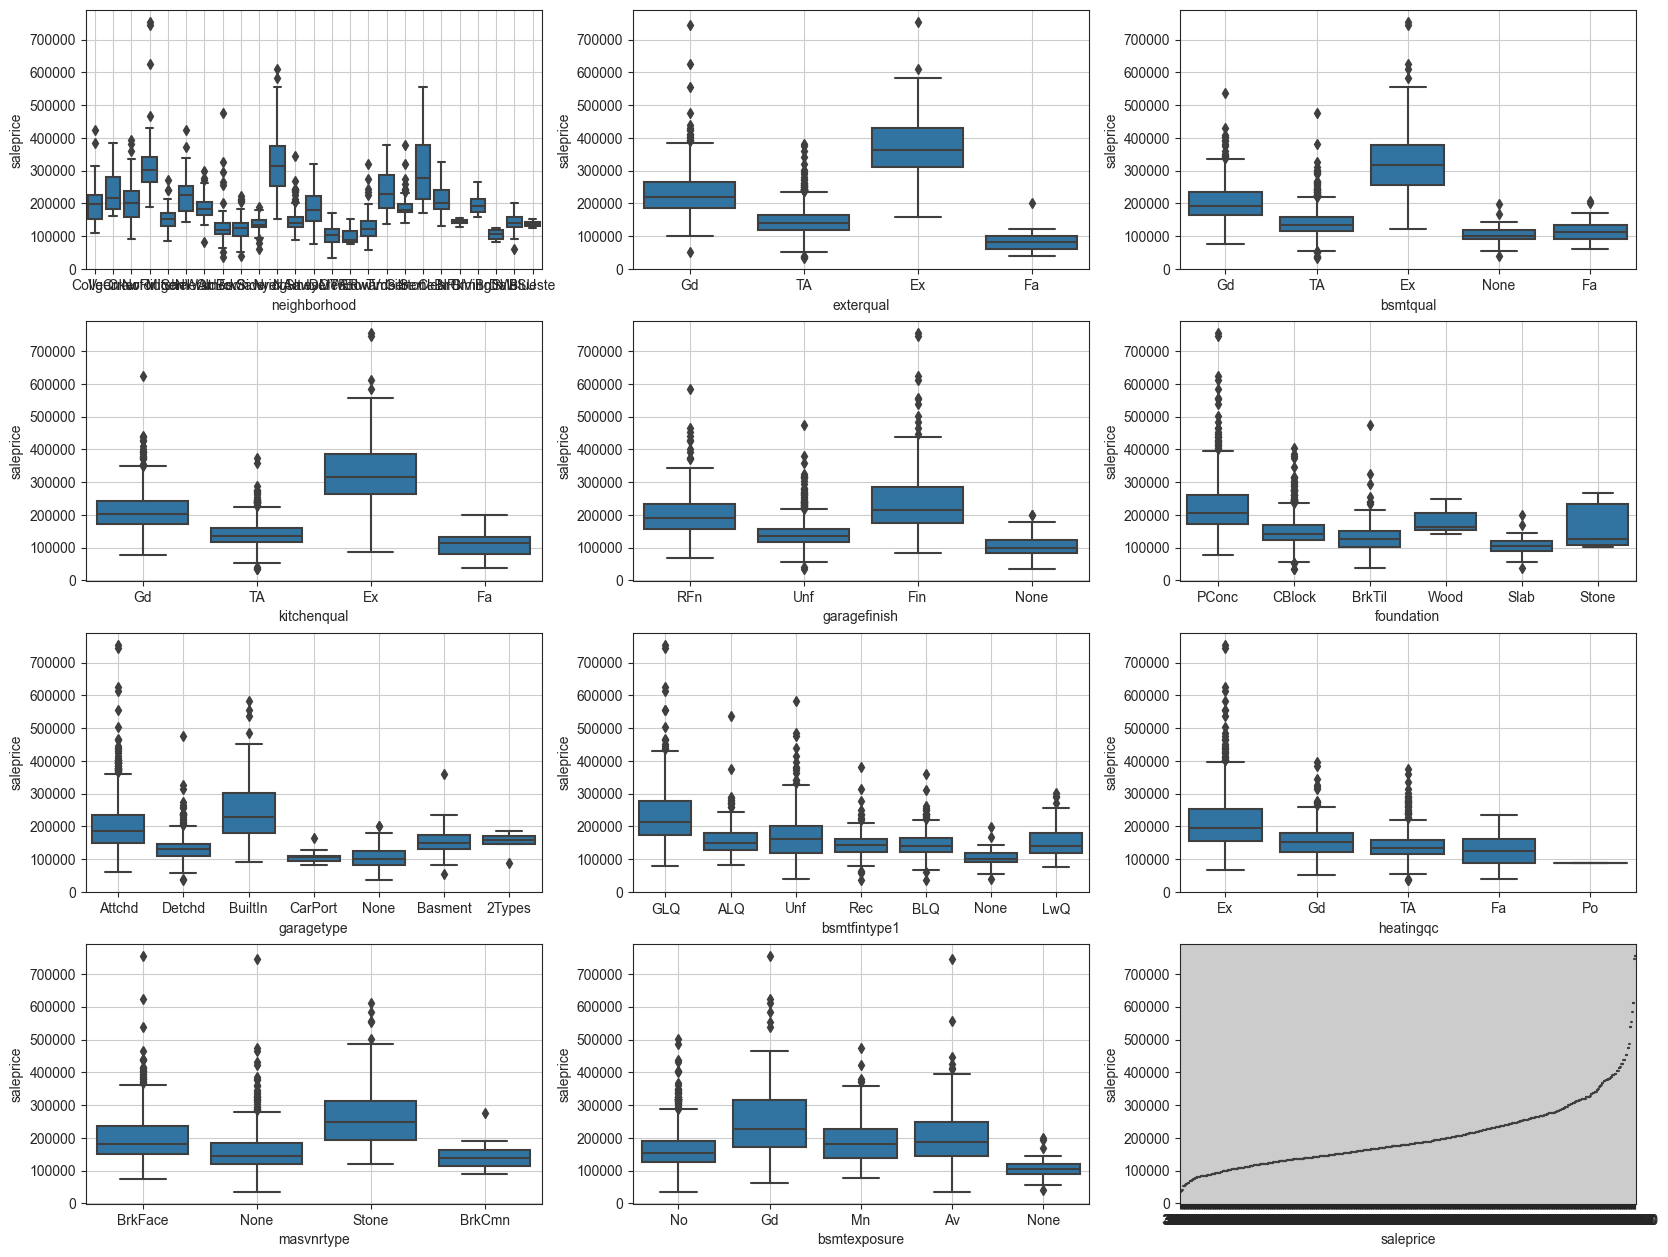

In [124]:
plt.figure(figsize = [20,60])

for i in range(len(df[testtt].columns)):
    plt.subplot(15, 3, i + 1)
    sns.boxplot(data = df[testtt], x = df[testtt].iloc[:,i], y = 'saleprice', color='#1f77b4')
    plt.grid()

In [125]:
signicant_cols = sig_cols_lst + num_lst

In [126]:
df = df[signicant_cols].copy()

<br><br><br>

## **Pre-Modelling**
<br>

### **Data Preparation**

In [127]:
df.shape

(1460, 25)

In [128]:
df.head()

,neighborhood,exterqual,bsmtqual,kitchenqual,garagefinish,foundation,garagetype,bsmtfintype1,heatingqc,masvnrtype,bsmtexposure,overallqual,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice
0,CollgCr,Gd,Gd,Gd,RFn,PConc,Attchd,GLQ,Ex,BrkFace,No,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,Veenker,TA,Gd,TA,RFn,CBlock,Attchd,ALQ,Ex,None,Gd,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,CollgCr,Gd,Gd,Gd,RFn,PConc,Attchd,GLQ,Ex,BrkFace,Mn,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,Crawfor,TA,TA,Gd,Unf,BrkTil,Detchd,ALQ,Gd,None,No,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,NoRidge,Gd,Gd,Gd,RFn,PConc,Attchd,GLQ,Ex,BrkFace,Av,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


In [129]:
df.bsmtqual.unique()

array(['Gd', 'TA', 'Ex', 'None', 'Fa'], dtype=object)

In [130]:
_map = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}
for col in ['exterqual','bsmtqual','kitchenqual','heatingqc']:
    df[col] = df[col].map(_map)

In [131]:
df.head()

,neighborhood,exterqual,bsmtqual,kitchenqual,garagefinish,foundation,garagetype,bsmtfintype1,heatingqc,masvnrtype,bsmtexposure,overallqual,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice
0,CollgCr,4,4,4,RFn,PConc,Attchd,GLQ,5,BrkFace,No,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,Veenker,3,4,3,RFn,CBlock,Attchd,ALQ,5,None,Gd,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,CollgCr,4,4,4,RFn,PConc,Attchd,GLQ,5,BrkFace,Mn,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,Crawfor,3,3,4,Unf,BrkTil,Detchd,ALQ,4,None,No,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,NoRidge,4,4,4,RFn,PConc,Attchd,GLQ,5,BrkFace,Av,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000


In [132]:
object_cols = [col for col in df.columns if df[col].dtypes == 'object']

In [133]:
enc_hot =  pd.get_dummies(df[object_cols])
enc_hot.shape

(1460, 58)

In [134]:
df = pd.concat([df, enc_hot], axis=1)
df.drop(object_cols, axis=1, inplace=True)
df.shape

(1460, 76)

In [135]:
df.head()

,exterqual,bsmtqual,kitchenqual,heatingqc,overallqual,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,garagefinish_Fin,garagefinish_None,garagefinish_RFn,garagefinish_Unf,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,bsmtfintype1_ALQ,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,bsmtexposure_Av,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtexposure_None
0,4,4,4,5,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,3,4,3,5,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,4,4,4,5,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,3,3,4,4,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,4,4,5,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [136]:
def log_sale():
    df['log_saleprice'] = np.log1p(df.saleprice)
    g('log_saleprice')
    stat_('log_saleprice')
    _probplt('log_saleprice')

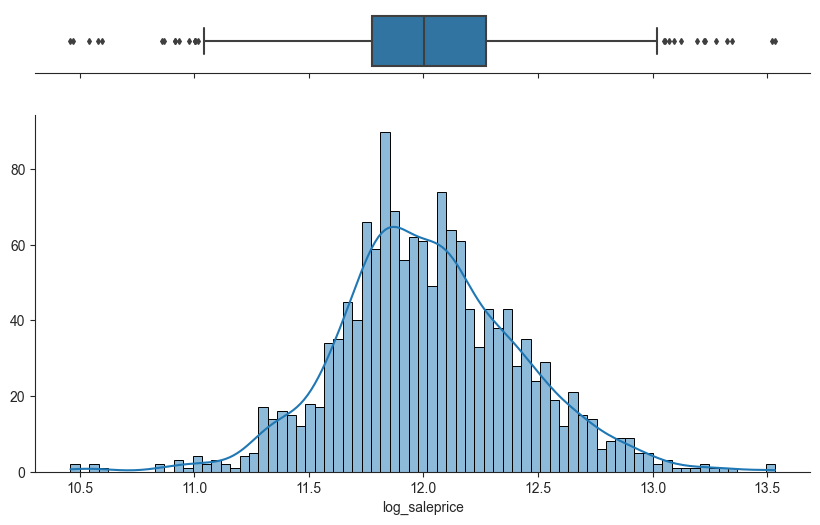

Skewness: 0.121
Kurtosis: 0.81


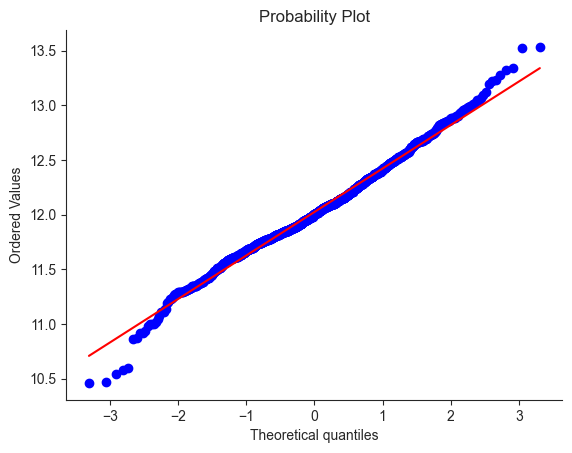

In [137]:
log_sale()

In [138]:
df.head()

,exterqual,bsmtqual,kitchenqual,heatingqc,overallqual,yearbuilt,yearremodadd,masvnrarea,totalbsmtsf,1stflrsf,grlivarea,fullbath,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,saleprice,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,garagefinish_Fin,garagefinish_None,garagefinish_RFn,garagefinish_Unf,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garagetype_2Types,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_None,bsmtfintype1_ALQ,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_None,bsmtfintype1_Rec,bsmtfintype1_Unf,masvnrtype_BrkCmn,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,bsmtexposure_Av,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtexposure_None,log_saleprice
0,4,4,4,5,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,12.247699
1,3,4,3,5,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,12.109016
2,4,4,4,5,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,12.317171
3,3,3,4,4,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,11.849405
4,4,4,4,5,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,12.429220


### **Test and Train**

In [139]:
df.shape

(1460, 77)

In [140]:
df_model = df.copy()

In [141]:
feature_cols = list(df_model)
feature_cols.remove('log_saleprice') 
feature_cols.remove('saleprice')

X = df_model[feature_cols]
#y = df_model['saleprice']
y = df_model['log_saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

<br><br><br>


## **Modelling**
<br>

**Functions**

In [192]:
def _metrics(y_test,pred,model):
    '''Returns RSME and R^2 for the model'''
    mae = mean_absolute_error(y_test,pred)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,pred)
    print(f'RMSE: {rmse:.3f} \nR^2: {r2:.3f}')
    print(f'Train Accuracy: {model.score(X_train,y_train):.4f}')
    print(f'Test Accuracy: {model.score(X_test,y_test):.4f}')

In [193]:
def tvp(p, t=y_test):
    '''Returns plot of y_test against y_pred & distribution of their difference''' 
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].scatter(t,p)
    axs[0].axline((0, 0), slope=1, color='red', alpha=0.5, linestyle='--')
    axs[0].set_xlim([10.5, 14])
    axs[0].set_ylim([10.5, 14])
    sns.despine()
    sns.histplot(t-p, ax=axs[1])
    plt.show()

### **Linear Regression**

In [196]:
lr=LinearRegression()
lr.fit(X_train,y_train)
linreg_pred = lr.predict(X_test)

In [197]:
_metrics(y_test,linreg_pred,lr)

RMSE: 0.145 
R^2: 0.888
Train Accuracy: 0.8753
Test Accuracy: 0.8876


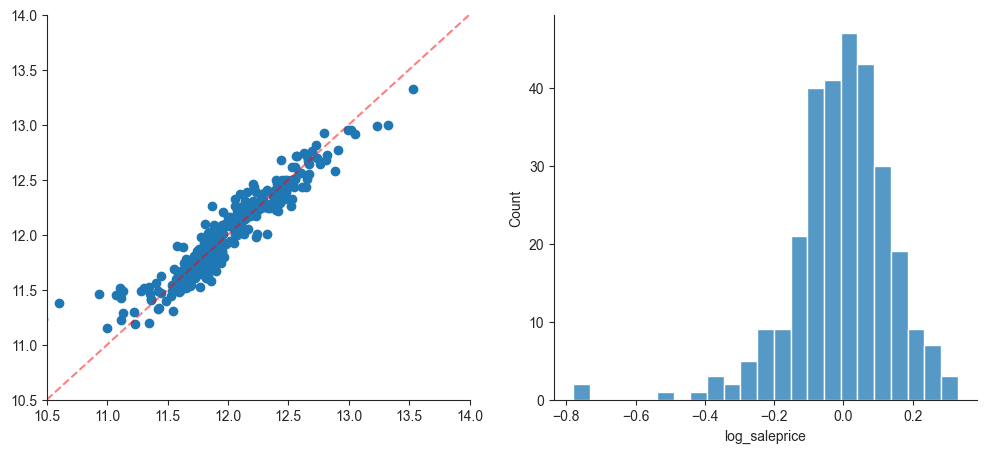

In [198]:
tvp(linreg_pred)

### **Decision Tree Regresson**

In [259]:
dtreg = DecisionTreeRegressor(random_state = 0)  ## Defining the Decision Tree Function
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [260]:
dtreg_pred = dtreg.predict(X_test)

In [261]:
_metrics(y_test, dtreg_pred, dtreg)

RMSE: 0.206 
R^2: 0.773
Train Accuracy: 0.9999
Test Accuracy: 0.7729


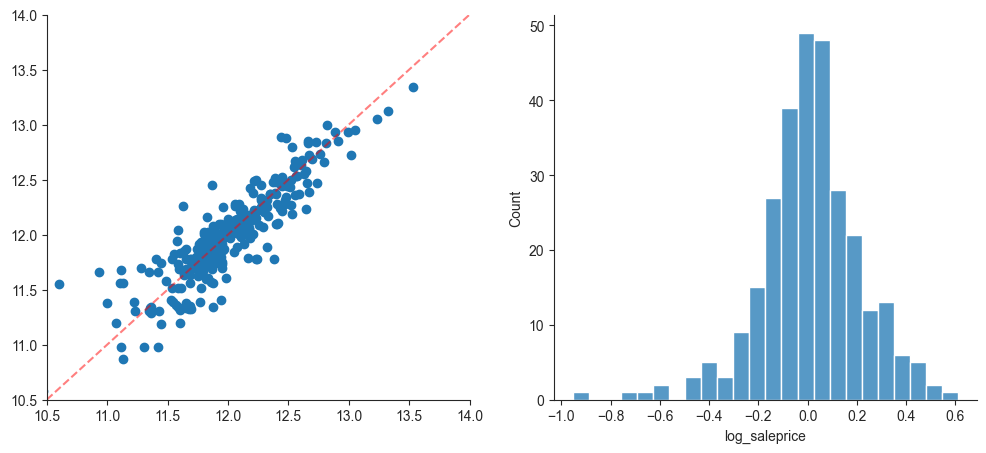

In [262]:
tvp(dtreg_pred)

In [263]:
print('Parameters currently in use:\n')
pprint(dtreg.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}


In [264]:
parameters={"splitter":["best"],
            "max_depth" : [5,6,7,None],
           "min_samples_leaf":[1,2],
           "min_weight_fraction_leaf":[0.05,0.1,0.15],
           "max_features":[None],
           "max_leaf_nodes":[None] }

In [265]:
tuning_model=GridSearchCV(dtreg,param_grid=parameters,scoring='r2',cv=3,verbose=1)

In [266]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [267]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.0 : 0.0 : 0.46


In [268]:
tuning_model.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.05,
 'splitter': 'best'}

In [269]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=6,max_features=None,max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.05,splitter='best')

In [270]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, min_weight_fraction_leaf=0.05)

In [271]:
tuned_pred=tuned_hyper_model.predict(X_test)

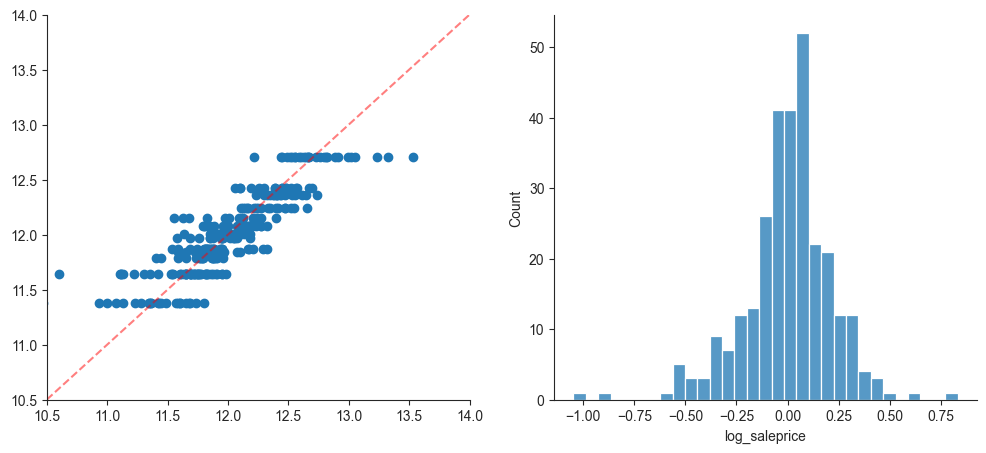

In [272]:
tvp(tuned_pred)

In [273]:
_metrics(y_test, tuned_pred,tuned_hyper_model)

RMSE: 0.217 
R^2: 0.747
Train Accuracy: 0.7506
Test Accuracy: 0.7470


### **Random Forest Regression**

In [274]:
rf = RandomForestRegressor(random_state = 0)

In [275]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [276]:
rf_y_pred = rf.predict(X_test)

In [277]:
_metrics(y_test, rf_y_pred,rf)

RMSE: 0.158 
R^2: 0.866
Train Accuracy: 0.9792
Test Accuracy: 0.8663


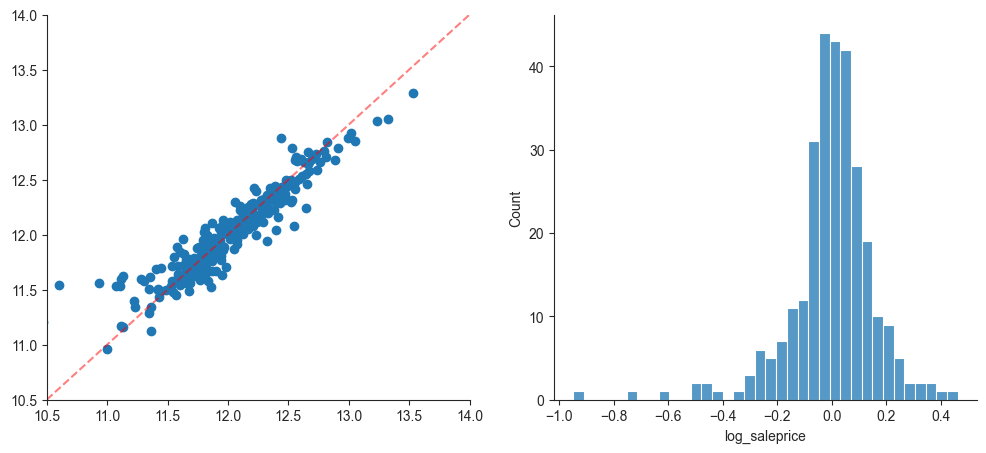

In [278]:
tvp(rf_y_pred)

In [279]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [405]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50,55,60,65],
    'max_features': [19,20,21,22],
    'min_samples_leaf': [1],
    'min_samples_split': [2,3,4],
    'n_estimators': [90,100,110,150,105,103]
}

In [406]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='r2', cv = 3, n_jobs = -1, verbose = 2)

In [407]:
grid_search.fit(X,y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 55, 60, 65],
                         'max_features': [19, 20, 21, 22],
                         'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 100, 110, 150, 105, 103]},
             scoring='r2', verbose=2)

In [408]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [409]:
rf_hyper_model= RandomForestRegressor(bootstrap = True,max_depth= 50,max_features= 21,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 150)

In [410]:
rf_hyper_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, max_features=21, n_estimators=150)

In [411]:
rf_hyper_pred=rf_hyper_model.predict(X_test)

In [412]:
_metrics(y_test, rf_hyper_pred,rf_hyper_model)

RMSE: 0.156 
R^2: 0.870
Train Accuracy: 0.9801
Test Accuracy: 0.8697


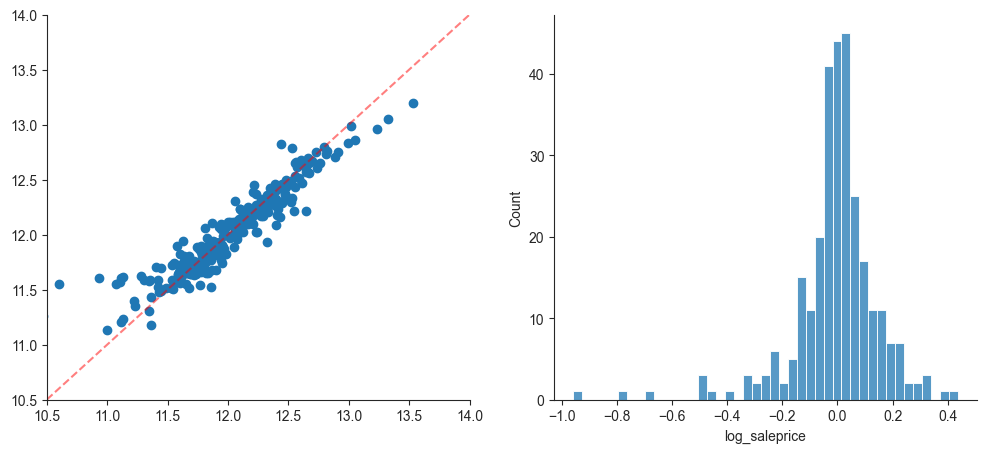

In [413]:
tvp(rf_hyper_pred)

<br>

### **Support Vector Machine**

In [415]:
svrregressor = SVR(kernel = 'rbf')
svrregressor.fit(X_train, y_train)

SVR()

In [416]:
svr_pred=svrregressor.predict(X_test)

In [ ]:
# parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
# svr = SVR()
# clf = GridSearchCV(svr, parameters)
# clf.fit(X_train, y_train)
# clf.best_params_

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 

In [418]:
_metrics(y_test, svr_pred,svrregressor)

RMSE: 0.201 
R^2: 0.784
Train Accuracy: 0.7766
Test Accuracy: 0.7842


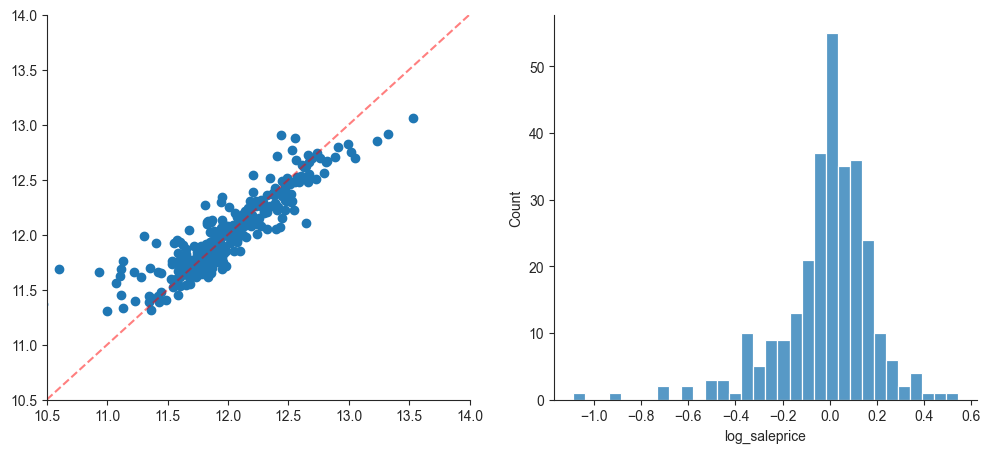

In [419]:
tvp(svr_pred)

<br>

### **Gradient Boosting**

In [422]:
RegModel=XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, objective='reg:squarederror', booster='gbtree')

In [426]:
XGB=RegModel.fit(X_train,y_train)
xg_pred=XGB.predict(X_test)

In [427]:
_metrics(y_test, xg_pred,XGB)

RMSE: 0.148 
R^2: 0.883
Train Accuracy: 0.9836
Test Accuracy: 0.8831


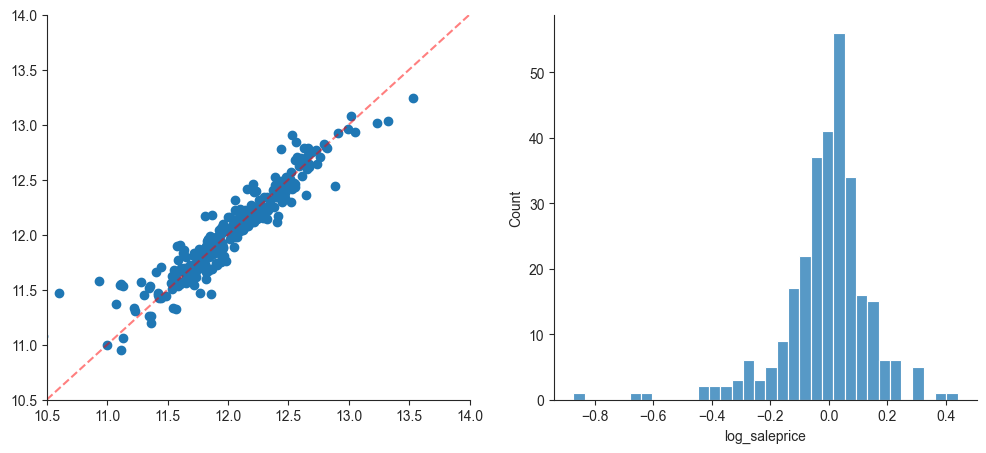

In [428]:
tvp(xg_pred)

<br>

### **Light Gradient Boosting**

In [431]:
lgbm_model = LGBMRegressor(random_state = 42)

In [432]:
lgbm_model.fit(X_train,y_train)

LGBMRegressor(random_state=42)

In [433]:
lgbm_pred = lgbm_model.predict(X_test)

In [435]:
_metrics(y_test, lgbm_pred,lgbm_model)

RMSE: 0.157 
R^2: 0.868
Train Accuracy: 0.9759
Test Accuracy: 0.8678


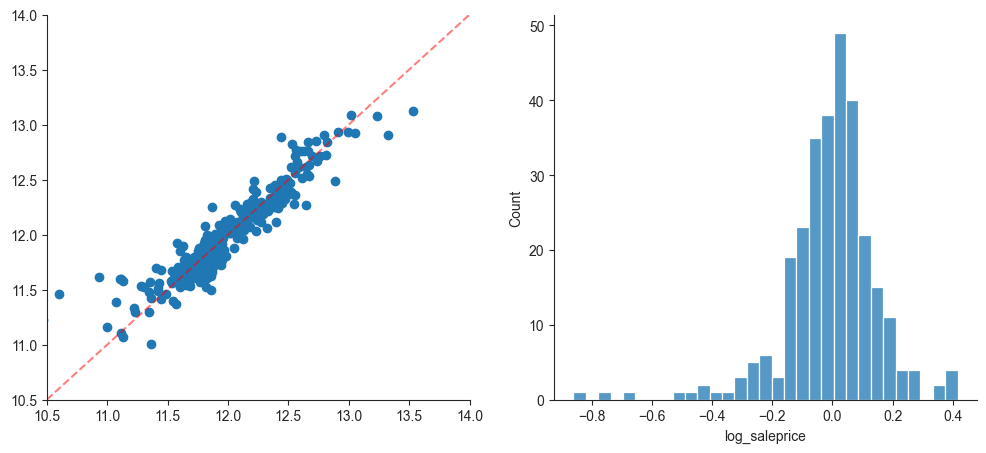

In [436]:
tvp(lgbm_pred)

<br>

### **CatBoost Gradient Boosting**

In [438]:
catb_model = CatBoostRegressor(verbose=0, n_estimators=150)

In [439]:
catb_model.fit(X_train,y_train)

In [440]:
cat_pred = catb_model.predict(X_test)

In [442]:
_metrics(y_test, cat_pred,catb_model)

RMSE: 0.139 
R^2: 0.897
Train Accuracy: 0.9719
Test Accuracy: 0.8967


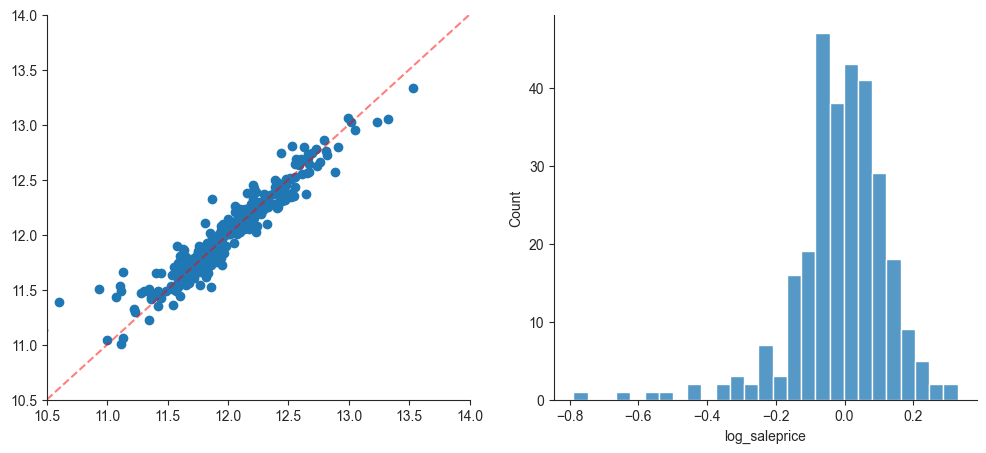

In [443]:
tvp(cat_pred)